In [1]:
import os
import pickle as pkl

import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats



def differential_expression_analysis(output_dir, count_matrix, meta_data):

    inference = DefaultInference(n_cpus=8)
    dds = DeseqDataSet(
        counts=count_matrix,
        metadata=meta_data,
        design_factors="condition",
        refit_cooks=True,
        inference=inference,
    )

    dds.deseq2()

    print(dds)
    print(dds.varm["dispersions"])
    print(dds.varm["LFC"])

    stat_res = DeseqStats(dds, inference=inference)
    print(stat_res.summary())
    return stat_res, dds





# B_C

In [4]:
count_matrix = pd.read_csv('count_matrix_diff_analysis.csv',index_col=0)
meta_data = pd.read_csv('meta_data_diff_analysis.csv',index_col=0)
meta_data = meta_data[meta_data.condition.isin(['B','C'])]
count_matrix = count_matrix.T
count_matrix = count_matrix[count_matrix.index.isin(meta_data.index)]
#print(count_matrix)
#print(meta_data)


stat_res, dds = differential_expression_analysis(output_dir='./different_expression_output/B_C', count_matrix=count_matrix, meta_data=meta_data)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 1.20 seconds.

Fitting dispersion trend curve...
... done in 0.18 seconds.

Fitting MAP dispersions...
... done in 1.47 seconds.

Fitting LFCs...
... done in 0.73 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 34 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...


AnnData object with n_obs × n_vars = 53 × 17330
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'
[0.05611028 0.01419661 0.12539018 ... 0.09930742 0.03077812 0.03731135]
                 intercept  condition_C_vs_B
ENSG00000182870   7.156507          0.090091
ENSG00000039523   7.431631          0.010262
ENSG00000198142   4.569955         -0.025171
ENSG00000182366   3.184550          0.267422
ENSG00000168490   9.049419          0.100087
...                    ...               ...
ENSG00000143590   5.649745          0.105878
ENSG00000134824   8

... done in 0.45 seconds.



In [5]:
res = stat_res.results_df.sort_values(by = 'padj' )
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
res['Symbol'] = res.index.map(mapper.mapper) 


In [8]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000183386,183.623672,-0.290605,0.068599,-4.236309,0.000023,0.393780,FHL3
ENSG00000259994,120.626602,0.339376,0.086088,3.942215,0.000081,0.447654,AL353796.1
ENSG00000126709,1861.385678,0.794947,0.204744,3.882649,0.000103,0.447654,IFI6
ENSG00000183628,35.885081,1.305113,0.334754,3.898728,0.000097,0.447654,DGCR6
ENSG00000213366,508.067563,-0.460327,0.123574,-3.725102,0.000195,0.676690,GSTM2
...,...,...,...,...,...,...,...
ENSG00000203485,2623.797655,0.000039,0.063344,0.000618,0.999507,0.999824,INF2
ENSG00000178201,154.868657,-0.000081,0.125716,-0.000640,0.999489,0.999824,VN1R1
ENSG00000172469,65.383917,0.000056,0.120661,0.000460,0.999633,0.999824,MANEA
ENSG00000107798,638.888649,-0.000003,0.080102,-0.000032,0.999975,0.999975,LIPA


In [9]:
res = res[res.baseMean >= 10]
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000183386,183.623672,-0.290605,0.068599,-4.236309,0.000023,0.393780,FHL3
ENSG00000259994,120.626602,0.339376,0.086088,3.942215,0.000081,0.447654,AL353796.1
ENSG00000126709,1861.385678,0.794947,0.204744,3.882649,0.000103,0.447654,IFI6
ENSG00000183628,35.885081,1.305113,0.334754,3.898728,0.000097,0.447654,DGCR6
ENSG00000213366,508.067563,-0.460327,0.123574,-3.725102,0.000195,0.676690,GSTM2
...,...,...,...,...,...,...,...
ENSG00000203485,2623.797655,0.000039,0.063344,0.000618,0.999507,0.999824,INF2
ENSG00000178201,154.868657,-0.000081,0.125716,-0.000640,0.999489,0.999824,VN1R1
ENSG00000172469,65.383917,0.000056,0.120661,0.000460,0.999633,0.999824,MANEA
ENSG00000107798,638.888649,-0.000003,0.080102,-0.000032,0.999975,0.999975,LIPA


In [10]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]


In [11]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol


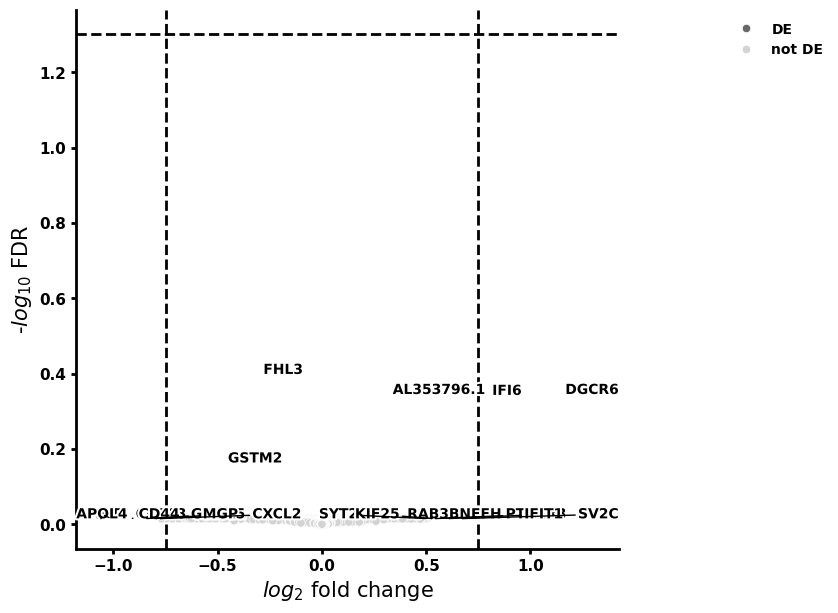

In [12]:
from sanbomics.plots import volcano

volcano(res, symbol='Symbol', to_label = 10,figsize = (7,7) )


# A_B

In [13]:
count_matrix = pd.read_csv('count_matrix_diff_analysis.csv',index_col=0)
meta_data = pd.read_csv('meta_data_diff_analysis.csv',index_col=0)
meta_data = meta_data[meta_data.condition.isin(['B','A'])]
count_matrix = count_matrix.T
count_matrix = count_matrix[count_matrix.index.isin(meta_data.index)]
#print(count_matrix)
#print(meta_data)


stat_res, dds = differential_expression_analysis(output_dir='./different_expression_output/A_B', count_matrix=count_matrix, meta_data=meta_data)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 1.23 seconds.

Fitting dispersion trend curve...
... done in 0.17 seconds.

Fitting MAP dispersions...
... done in 1.52 seconds.

Fitting LFCs...
... done in 0.76 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 16 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...


AnnData object with n_obs × n_vars = 71 × 17330
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'
[0.05967565 0.0258404  0.1114767  ... 0.1010755  0.0371822  0.0371648 ]
                 intercept  condition_B_vs_A
ENSG00000182870   7.312584         -0.104660
ENSG00000039523   7.516836         -0.034014
ENSG00000198142   4.455157          0.165278
ENSG00000182366   3.516699         -0.280317
ENSG00000168490   9.254000         -0.153098
...                    ...               ...
ENSG00000143590   5.793849         -0.092156
ENSG00000134824   8

... done in 0.44 seconds.



In [14]:
res = stat_res.results_df.sort_values(by = 'padj' )
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
res['Symbol'] = res.index.map(mapper.mapper) 

In [15]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000170522,381.245826,-0.345143,0.059314,-5.818951,5.921810e-09,0.000103,ELOVL6
ENSG00000153714,91.494706,-0.389987,0.081400,-4.790985,1.659646e-06,0.014381,LURAP1L
ENSG00000160712,363.692795,0.557109,0.122052,4.564529,5.006177e-06,0.028919,IL6R
ENSG00000104368,424.795879,0.528593,0.120301,4.393938,1.113158e-05,0.032152,PLAT
ENSG00000085831,142.589024,-0.436968,0.097551,-4.479369,7.486398e-06,0.032152,TTC39A
...,...,...,...,...,...,...,...
ENSG00000140153,356.596565,-0.000043,0.035273,-0.001231,9.990178e-01,0.999275,WDR20
ENSG00000101191,929.237273,-0.000042,0.042742,-0.000973,9.992235e-01,0.999397,DIDO1
ENSG00000134077,357.917267,-0.000038,0.043557,-0.000878,9.992992e-01,0.999415,THUMPD3
ENSG00000272150,31.852479,-0.000074,0.093859,-0.000787,9.993717e-01,0.999429,NBPF25P


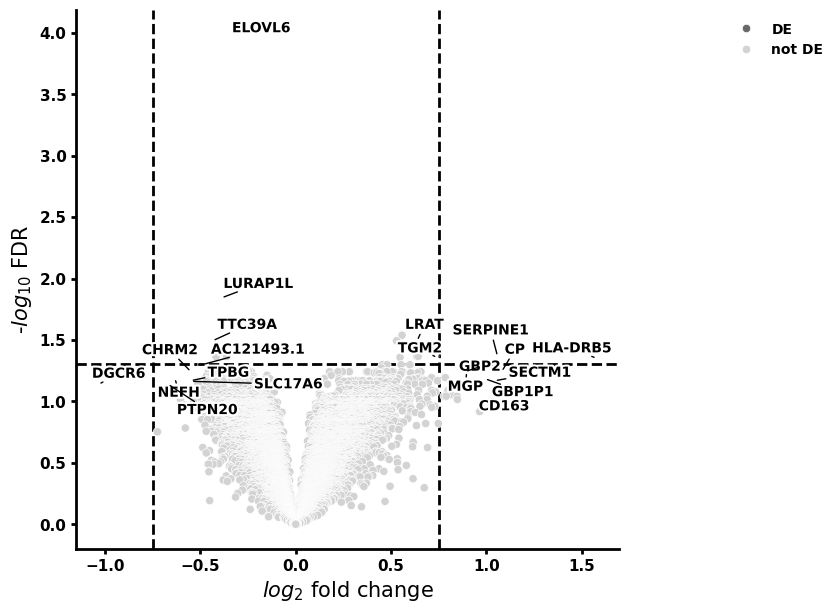

In [16]:
from sanbomics.plots import volcano

volcano(res, symbol='Symbol', to_label = 10,figsize = (7,7) )


# A_C

In [22]:
count_matrix = pd.read_csv('count_matrix_diff_analysis.csv',index_col=0)
meta_data = pd.read_csv('meta_data_diff_analysis.csv',index_col=0)
meta_data = meta_data[meta_data.condition.isin(['C','A'])]
count_matrix = count_matrix.T
count_matrix = count_matrix[count_matrix.index.isin(meta_data.index)]
#print(count_matrix)
#print(meta_data)


stat_res, dds = differential_expression_analysis(output_dir='./different_expression_output/A_C', count_matrix=count_matrix, meta_data=meta_data)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 1.24 seconds.

Fitting dispersion trend curve...
... done in 0.21 seconds.

Fitting MAP dispersions...
... done in 1.55 seconds.

Fitting LFCs...
... done in 0.72 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 25 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...


AnnData object with n_obs × n_vars = 58 × 17330
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'
[0.04817718 0.02430452 0.10625288 ... 0.08853849 0.03799923 0.02456258]
                 intercept  condition_C_vs_A
ENSG00000182870   7.388507         -0.014408
ENSG00000039523   7.592886         -0.023592
ENSG00000198142   4.531006          0.140109
ENSG00000182366   3.593345         -0.012639
ENSG00000168490   9.329794         -0.052718
...                    ...               ...
ENSG00000143590   5.869696          0.012962
ENSG00000134824   8

... done in 0.42 seconds.



In [23]:
res = stat_res.results_df.sort_values(by = 'padj' )
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
res['Symbol'] = res.index.map(mapper.mapper) 

In [24]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000177989,75.921218,0.965218,0.203954,4.732524,0.000002,0.038428,ODF3B
ENSG00000126709,2147.520895,0.707953,0.184413,3.838955,0.000124,0.554416,IFI6
ENSG00000162692,25.551956,1.129376,0.294850,3.830339,0.000128,0.554416,VCAM1
ENSG00000111801,205.523072,0.384129,0.099674,3.853837,0.000116,0.554416,BTN3A3
ENSG00000253678,31.349736,0.092015,0.164217,0.560327,0.575257,0.974815,AC104964.2
...,...,...,...,...,...,...,...
ENSG00000104859,2029.635269,0.000508,0.101403,0.005012,0.996001,0.999777,CLASRP
ENSG00000226380,463.345577,-0.002384,0.146981,-0.016220,0.987059,0.999777,NaN
ENSG00000214293,136.942678,0.000321,0.061196,0.005240,0.995819,0.999777,APTR
ENSG00000174007,289.959626,-0.000273,0.098703,-0.002769,0.997791,0.999777,CEP19


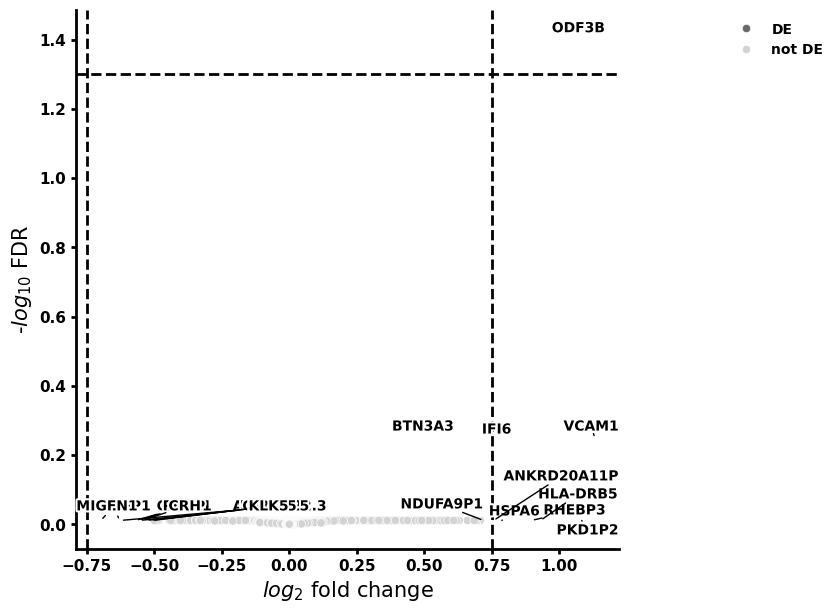

In [25]:
from sanbomics.plots import volcano

volcano(res, symbol='Symbol', to_label = 10,figsize = (7,7) )

In [5]:
import pandas as pd
count_matrix_diff = pd.read_csv('count_matrix_diff_analysis.csv',index_col=0)
count_matrix_diff 

,424_120507,444_120507,497_120515,232_120425,602_120523,545_120516,553_120517,711_120531,309_120430,520_120515,...,186_120424,76_120417,469_120514,363_120502,326_120501,591_120522,494_120515,197_120424,407_120503,554_120517
ENSG00000182870,628,1554,1433,2974,3065,824,1220,1132,1243,3304,...,599,1878,720,1769,1805,1941,2753,2125,1053,1717
ENSG00000039523,960,2196,1852,2743,3414,1033,1598,1477,1963,2958,...,727,2134,1088,2371,2110,2544,2800,2538,1424,2030
ENSG00000198142,63,85,65,97,105,51,86,106,77,89,...,51,110,55,112,83,116,171,104,61,70
ENSG00000182366,14,29,31,116,89,14,16,28,15,89,...,10,15,9,34,74,45,129,70,26,43
ENSG00000168490,2815,11549,9530,27287,21563,4935,7388,7415,7831,22714,...,3386,7373,2837,11726,14344,19678,22062,16529,6691,11039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000143590,90,306,261,644,498,265,226,248,370,511,...,149,342,150,369,459,372,369,446,234,439
ENSG00000134824,2090,5358,2336,4753,4732,2089,3289,6162,2360,2839,...,1451,2223,2251,5109,2501,3940,5216,4266,2090,2850
ENSG00000127586,165,346,303,579,439,222,356,234,302,345,...,178,259,101,423,429,420,613,488,202,316
ENSG00000104915,518,1024,731,1174,1093,546,942,653,809,1099,...,456,952,521,932,938,838,1260,976,689,809


In [6]:
count_matrix_diff = count_matrix_diff.T
count_matrix_diff

,ENSG00000182870,ENSG00000039523,ENSG00000198142,ENSG00000182366,ENSG00000168490,ENSG00000122042,ENSG00000139620,ENSG00000133641,ENSG00000273604,ENSG00000213246,...,ENSG00000170703,ENSG00000185813,ENSG00000104611,ENSG00000115875,ENSG00000181524,ENSG00000143590,ENSG00000134824,ENSG00000127586,ENSG00000104915,ENSG00000151611
424_120507,628,960,63,14,2815,576,90,86,142,226,...,15,701,41,454,17,90,2090,165,518,73
444_120507,1554,2196,85,29,11549,1944,213,296,476,549,...,79,1869,43,1183,34,306,5358,346,1024,226
497_120515,1433,1852,65,31,9530,1429,188,254,424,513,...,57,1224,56,1129,21,261,2336,303,731,147
232_120425,2974,2743,97,116,27287,2625,363,550,1073,1025,...,85,2767,55,1952,64,644,4753,579,1174,233
602_120523,3065,3414,105,89,21563,2974,372,624,881,982,...,102,2410,83,2381,39,498,4732,439,1093,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591_120522,1941,2544,116,45,19678,2265,292,458,574,721,...,84,2136,51,1605,46,372,3940,420,838,217
494_120515,2753,2800,171,129,22062,2738,437,472,951,995,...,62,2665,67,2246,41,369,5216,613,1260,217
197_120424,2125,2538,104,70,16529,2081,301,454,669,879,...,78,2113,50,1814,53,446,4266,488,976,222
407_120503,1053,1424,61,26,6691,868,91,151,388,313,...,8,963,42,495,16,234,2090,202,689,129


# Control_A

In [7]:
count_matrix = pd.read_csv('../../../../preprocessing_18_dec/count_matrix_AD_NCI_preprocessed.csv', index_col = 0)
count_matrix

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000282936,ENSG00000282951,ENSG00000283013,ENSG00000283041,ENSG00000283045,ENSG00000283050,ENSG00000283071,ENSG00000283078,ENSG00000283103,ENSG00000283108
23_120411,149,339,138,37,194,222,178,573,257,418,...,180,26,408,59,15,101,19,71,70,20
591_120522,196,384,160,30,261,380,258,810,369,605,...,189,43,644,86,26,104,50,57,58,34
691_120605,292,440,173,38,179,926,267,619,277,613,...,153,43,550,128,34,96,78,32,73,33
588_120522,302,461,149,37,141,575,169,700,328,524,...,240,32,594,71,27,113,30,67,62,18
604_120523,201,530,267,67,230,713,316,949,378,702,...,272,47,755,93,43,120,156,71,62,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677_120604,204,172,45,15,166,349,98,407,221,212,...,122,33,244,75,36,51,16,41,18,17
142_120419,156,322,125,28,157,130,165,496,253,339,...,182,13,312,40,5,67,31,37,49,23
120_120418,189,190,94,25,389,1230,144,470,233,305,...,251,64,366,120,82,117,20,44,64,49
483_120515,172,483,158,32,241,185,196,925,371,699,...,264,21,779,67,21,105,46,90,69,30


In [8]:
meta_data = pd.read_csv('meta_data_diff_analysis.csv',index_col=0)
meta_data

,condition
424_120507,B
444_120507,A
497_120515,A
232_120425,A
602_120523,C
...,...
591_120522,B
494_120515,A
197_120424,A
407_120503,A


In [9]:
count_matrix.loc[count_matrix_diff.index,]

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000282936,ENSG00000282951,ENSG00000283013,ENSG00000283041,ENSG00000283045,ENSG00000283050,ENSG00000283071,ENSG00000283078,ENSG00000283103,ENSG00000283108
424_120507,115,87,53,12,217,261,76,246,163,189,...,73,36,217,57,35,50,14,15,33,18
444_120507,265,335,115,37,398,364,198,713,320,420,...,232,69,469,78,70,124,31,53,60,41
497_120515,171,254,81,27,234,437,116,580,317,441,...,203,34,518,49,23,84,8,40,68,23
232_120425,178,667,204,31,156,375,249,731,344,863,...,191,32,813,137,55,56,49,128,70,42
602_120523,239,506,199,49,349,738,262,904,477,776,...,303,42,943,120,18,156,34,103,80,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591_120522,196,384,160,30,261,380,258,810,369,605,...,189,43,644,86,26,104,50,57,58,34
494_120515,237,489,226,55,360,388,344,929,447,751,...,189,45,756,74,21,102,87,74,76,31
197_120424,272,536,225,59,223,553,264,815,383,633,...,208,42,590,92,45,122,33,85,87,30
407_120503,84,117,49,14,162,134,76,265,226,289,...,203,50,395,65,39,47,14,23,31,24


In [10]:
control_list = list(set(count_matrix.index) - set(count_matrix_diff.index))

In [11]:
column_values = ['Control' for i in range(len(control_list))]

In [12]:
meta_data_2 = pd.DataFrame(column_values, index = control_list).rename(columns = {0:'condition'})

In [13]:
meta_data_2

,condition
501_120515,Control
633_120524,Control
408_120503,Control
74_120417,Control
28_120411,Control
...,...
626_120524,Control
360_120502,Control
481_120514,Control
168_120423,Control


In [14]:
meta_data_df = pd.concat([meta_data,meta_data_2])

In [15]:
meta_data_df

,condition
424_120507,B
444_120507,A
497_120515,A
232_120425,A
602_120523,C
...,...
626_120524,Control
360_120502,Control
481_120514,Control
168_120423,Control


In [16]:
count_matrix = count_matrix.loc[meta_data_df.index,]

In [17]:
count_matrix

,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,ENSG00000001460,...,ENSG00000282936,ENSG00000282951,ENSG00000283013,ENSG00000283041,ENSG00000283045,ENSG00000283050,ENSG00000283071,ENSG00000283078,ENSG00000283103,ENSG00000283108
424_120507,115,87,53,12,217,261,76,246,163,189,...,73,36,217,57,35,50,14,15,33,18
444_120507,265,335,115,37,398,364,198,713,320,420,...,232,69,469,78,70,124,31,53,60,41
497_120515,171,254,81,27,234,437,116,580,317,441,...,203,34,518,49,23,84,8,40,68,23
232_120425,178,667,204,31,156,375,249,731,344,863,...,191,32,813,137,55,56,49,128,70,42
602_120523,239,506,199,49,349,738,262,904,477,776,...,303,42,943,120,18,156,34,103,80,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626_120524,345,514,232,53,374,367,263,929,401,565,...,255,43,615,61,15,114,51,63,80,27
360_120502,208,363,162,38,419,473,244,649,252,448,...,194,53,466,108,58,91,24,73,90,31
481_120514,129,237,102,16,369,727,160,364,197,397,...,113,32,415,82,64,50,26,61,72,22
168_120423,150,403,141,40,134,117,203,703,351,716,...,265,23,654,48,9,66,35,89,73,23


In [23]:

meta_data_subset = meta_data_df[meta_data_df.condition.isin(['Control','A'])]
#count_matrix = count_matrix.T
count_matrix_subset = count_matrix[count_matrix.index.isin(meta_data_subset.index)]
stat_res, dds = differential_expression_analysis(output_dir='./different_expression_output/Control_C', count_matrix=count_matrix_subset, meta_data=meta_data_subset)



Fitting size factors...
... done in 0.05 seconds.

Fitting dispersions...
... done in 1.35 seconds.

Fitting dispersion trend curve...
... done in 0.24 seconds.

Fitting MAP dispersions...
... done in 1.70 seconds.

Fitting LFCs...
... done in 0.84 seconds.

Calculating cook's distance...
... done in 0.06 seconds.

Replacing 33 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...


AnnData object with n_obs × n_vars = 117 × 17330
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'
[0.11676937 0.03633731 0.0327836  ... 0.04834988 0.03003298 0.05414061]
                 intercept  condition_Control_vs_A
ENSG00000000003   5.360904               -0.028085
ENSG00000000419   5.840525                0.099475
ENSG00000000457   4.933401                0.000449
ENSG00000000460   3.575711               -0.054623
ENSG00000000938   5.618739               -0.102933
...                    ...                     ...
ENSG00000283050   4.4

... done in 0.40 seconds.



In [22]:
meta_data_subset

,condition
444_120507,A
497_120515,A
232_120425,A
309_120430,A
520_120515,A
...,...
626_120524,Control
360_120502,Control
481_120514,Control
168_120423,Control


In [24]:
res = stat_res.results_df.sort_values(by = 'padj' )
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
res['Symbol'] = res.index.map(mapper.mapper) 
res 

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000053702,405.179034,-0.547559,0.072855,-7.515754,5.658372e-14,9.805959e-10,NRIP2
ENSG00000158169,139.822445,-0.452583,0.070562,-6.413950,1.417969e-10,1.228670e-06,FANCC
ENSG00000010310,106.158223,-1.437490,0.234635,-6.126499,8.983402e-10,3.946261e-06,GIPR
ENSG00000196154,57.198248,-1.266463,0.206793,-6.124297,9.108507e-10,3.946261e-06,S100A4
ENSG00000154864,200.138151,-0.855431,0.144388,-5.924533,3.131857e-09,9.045846e-06,PIEZO2
...,...,...,...,...,...,...,...
ENSG00000172346,713.006185,-0.000081,0.101633,-0.000792,9.993680e-01,9.995987e-01,CSDC2
ENSG00000141665,56.793478,-0.000039,0.061383,-0.000631,9.994964e-01,9.996694e-01,FBXO15
ENSG00000113615,220.102249,0.000017,0.060717,0.000286,9.997717e-01,9.998870e-01,SEC24A
ENSG00000181524,31.560498,0.000012,0.088628,0.000137,9.998904e-01,9.998904e-01,RPL24P4


In [26]:
res.to_csv('./different_expression_output/A_Control/diff_exp_results.csv')

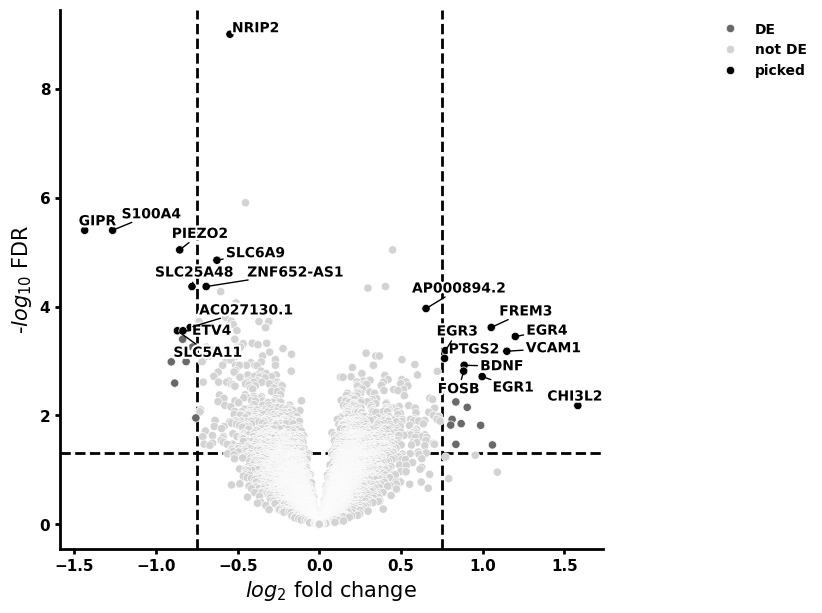

In [25]:
from sanbomics.plots import volcano

volcano(res, symbol='Symbol', to_label = 10,figsize = (7,7) )

# Control_B

In [33]:

meta_data_subset = meta_data_df[meta_data_df.condition.isin(['Control','B'])]
#count_matrix = count_matrix.T
count_matrix_subset = count_matrix[count_matrix.index.isin(meta_data_subset.index)]
stat_res, dds = differential_expression_analysis(output_dir='./different_expression_output/Control_C', count_matrix=count_matrix_subset, meta_data=meta_data_subset)
res = stat_res.results_df.sort_values(by = 'padj' )
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
res['Symbol'] = res.index.map(mapper.mapper) 
res 


Fitting size factors...
... done in 0.04 seconds.

Fitting dispersions...
... done in 1.35 seconds.

Fitting dispersion trend curve...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 2.08 seconds.

Fitting LFCs...
... done in 1.06 seconds.

Calculating cook's distance...
... done in 0.05 seconds.

Replacing 41 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...


AnnData object with n_obs × n_vars = 112 × 17330
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'
[0.12427166 0.03493321 0.03555208 ... 0.05183672 0.03158218 0.0609748 ]
                 intercept  condition_Control_vs_B
ENSG00000000003   5.432465               -0.154413
ENSG00000000419   5.674780                0.210555
ENSG00000000457   4.884193               -0.005269
ENSG00000000460   3.491317               -0.024954
ENSG00000000938   5.883564               -0.422992
...                    ...                     ...
ENSG00000283050   4.4

... done in 0.47 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000196154,57.988685,-1.535540,0.215583,-7.122743,1.058000e-12,1.833514e-08,S100A4
ENSG00000196517,416.538216,-0.803780,0.114798,-7.001669,2.529304e-12,2.191642e-08,SLC6A9
ENSG00000247982,63.107951,-0.748430,0.108425,-6.902722,5.101545e-12,2.946993e-08,LINC00926
ENSG00000165175,2502.158925,-0.703314,0.106520,-6.602632,4.039211e-11,1.601507e-07,MID1IP1
ENSG00000183943,539.128393,-0.869076,0.132025,-6.582674,4.620619e-11,1.601507e-07,PRKX
...,...,...,...,...,...,...,...
ENSG00000125430,57.445937,0.000079,0.224595,0.000353,9.997180e-01,9.999488e-01,HS3ST3B1
ENSG00000127586,378.785759,-0.000006,0.101415,-0.000054,9.999566e-01,9.999765e-01,CHTF18
ENSG00000169436,59.025197,0.000006,0.203060,0.000029,9.999765e-01,9.999765e-01,COL22A1
ENSG00000155561,377.012778,-0.000008,0.054881,-0.000154,9.998775e-01,9.999765e-01,NUP205


In [34]:
res.to_csv('./different_expression_output/B_Control/diff_exp_results.csv')

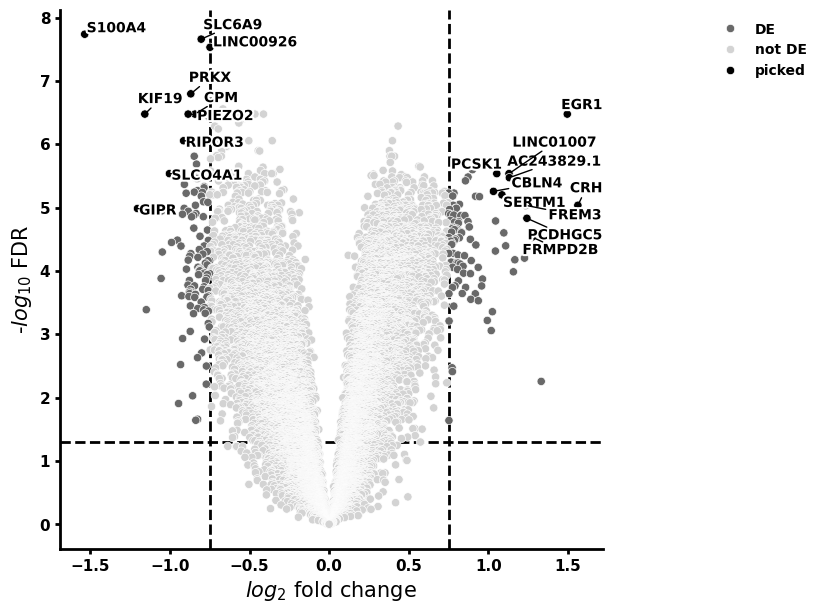

In [35]:
from sanbomics.plots import volcano

volcano(res, symbol='Symbol', to_label = 10,figsize = (7,7) )

# Control_C

In [30]:

meta_data_subset = meta_data_df[meta_data_df.condition.isin(['Control','C'])]
#count_matrix = count_matrix.T
count_matrix_subset = count_matrix[count_matrix.index.isin(meta_data_subset.index)]
stat_res, dds = differential_expression_analysis(output_dir='./different_expression_output/Control_C', count_matrix=count_matrix_subset, meta_data=meta_data_subset)
res = stat_res.results_df.sort_values(by = 'padj' )
from sanbomics.tools import id_map
mapper = id_map(species = 'human')
res['Symbol'] = res.index.map(mapper.mapper) 
res 


Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 1.37 seconds.

Fitting dispersion trend curve...
... done in 0.35 seconds.

Fitting MAP dispersions...
... done in 1.46 seconds.

Fitting LFCs...
... done in 0.80 seconds.

Calculating cook's distance...
... done in 0.04 seconds.

Replacing 47 outlier genes.

Fitting dispersions...
... done in 0.02 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.

Running Wald tests...


AnnData object with n_obs × n_vars = 99 × 17330
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', '_mu_LFC', '_hat_diagonals', 'replaceable'
    varm: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'replace_cooks'
[0.10470832 0.04003678 0.03253325 ... 0.04549759 0.03068415 0.06985582]
                 intercept  condition_Control_vs_C
ENSG00000000003   5.302283                0.037381
ENSG00000000419   5.734386                0.212448
ENSG00000000457   4.884644                0.056105
ENSG00000000460   3.543881               -0.015593
ENSG00000000938   5.726453               -0.203824
...                    ...                     ...
ENSG00000283050   4.51

... done in 0.50 seconds.



,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000053702,388.654223,-0.559203,0.094530,-5.915586,3.306968e-09,0.000057,NRIP2
ENSG00000158169,135.865123,-0.486897,0.085445,-5.698377,1.209532e-08,0.000090,FANCC
ENSG00000104112,4477.551571,0.461564,0.081611,5.655636,1.552702e-08,0.000090,SCG3
ENSG00000123472,2427.725928,0.294472,0.053453,5.509043,3.607898e-08,0.000156,ATPAF1
ENSG00000183090,59.020661,1.355352,0.249700,5.427924,5.701328e-08,0.000198,FREM3
...,...,...,...,...,...,...,...
ENSG00000231999,75.854057,-0.000089,0.075088,-0.001190,9.990503e-01,0.999223,LRRC8C-DT
ENSG00000162695,316.143572,0.000099,0.080480,0.001227,9.990207e-01,0.999223,SLC30A7
ENSG00000147604,5003.515084,-0.000049,0.059418,-0.000822,9.993438e-01,0.999459,RPL7
ENSG00000197582,179.032265,-0.000285,0.450691,-0.000633,9.994947e-01,0.999552,GPX1P1


In [31]:
res.to_csv('./different_expression_output/C_Control/diff_exp_results.csv')

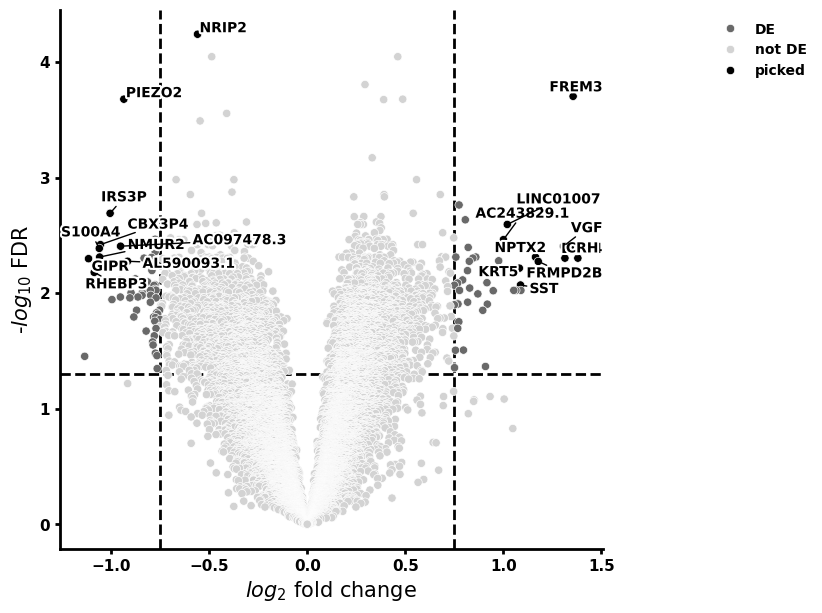

In [32]:
from sanbomics.plots import volcano

volcano(res, symbol='Symbol', to_label = 10,figsize = (7,7) )

In [36]:
!pwd


/12tb_dsk1/danish/Gene_Regulatory_Network_ROSMAP/code/New_GRN_ROSMAP/code/community_detection_Tf/differential_expression_analysis
